# Importing necessary libraries



In [ ]:
import torch
print(torch.__version__)

2.5.1+cu124


In [ ]:
# System Libraries
import zipfile
import os

# Data Manipulation and Image Processing Libraries
import pandas as pd
import numpy as np
import cv2
from tqdm import tqdm

# Face Detection and Recognition Libraries
!pip install mtcnn
from mtcnn import MTCNN  # For face detection

# TensorFlow / Keras for model usage
import tensorflow as tf

# To display images inline in Colab
import matplotlib.pyplot as plt
from PIL import Image


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.5 MB/s eta 0:00:00


# Mounting Drive and loading the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os
import pandas as pd

# Path to the zipped file on Google Drive
zip_path = '/content/drive/MyDrive/face_data.zip'
dataset_dir = '/content/dataset'  # Unzip destination

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_dir)

print(f"Dataset extracted to {dataset_dir}")


Dataset extracted to /content/dataset


# Creating Labels for each images

In [ ]:
import os
import pandas as pd

# Path to the dataset folder
dataset_folder = '/content/dataset/face_data'

# Initialize a list to store image file names and their corresponding labels
image_data = []

# Loop through the dataset folder to gather image files and extract labels
for subdir, _, files in os.walk(dataset_folder):
    for file in files:
        # Make sure it's an image file (you can add more image extensions if needed)
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):

            # Option 1: Extract label before the last underscore (e.g., 'john_doe_01.jpg' -> 'john_doe')
            label = '_'.join(file.split('_')[:-1])

            # Option 2: If label is before the first underscore (e.g., 'john_01.jpg' -> 'john')
            if not label:  # If the first method didn't work
                label = file.split('_')[0]

            # Option 3: If label is before a dash (e.g., 'john-01.jpg' -> 'john')
            if not label:
                label = file.split('-')[0]

            # Option 4: If the label is the entire filename without the extension (e.g., 'john.jpg' -> 'john')
            if not label:
                label = os.path.splitext(file)[0]

            # Option 5: If labels are stored as folder names (e.g., 'dataset_folder/john/image1.jpg')
            if not label:
                label = os.path.basename(subdir)

            # Store the image file name and its label
            image_data.append([file, label])

# Create a DataFrame from the extracted image data
image_df = pd.DataFrame(image_data, columns=['id', 'label'])

# Display the DataFrame to verify
print(image_df.head())


                      id                  label
0  Harsh Khanal  (4).jpg  Harsh Khanal  (4).jpg
1  Harsh Khanal  (5).jpg  Harsh Khanal  (5).jpg
2  Harsh Khanal  (6).jpg  Harsh Khanal  (6).jpg
3  Harsh Khanal  (2).jpg  Harsh Khanal  (2).jpg
4  Harsh Khanal  (7).jpg  Harsh Khanal  (7).jpg


In [ ]:
image_df['label'] = image_df['id'].str.replace(r'\s\(\d+\)', '', regex=True)  # Remove numbers in parentheses
image_df['label'] = image_df['label'].str.replace(r'\.\w+$', '', regex=True)

In [ ]:
image_df["label"]

,label
0,Harsh Khanal
1,Harsh Khanal
2,Harsh Khanal
3,Harsh Khanal
4,Harsh Khanal
...,...
166,Kumar Vishal
167,Kumar Vishal
168,Kumar Vishal
169,Kumar Vishal


In [ ]:
image_df

,id,label
0,Harsh Khanal (4).jpg,Harsh Khanal
1,Harsh Khanal (5).jpg,Harsh Khanal
2,Harsh Khanal (6).jpg,Harsh Khanal
3,Harsh Khanal (2).jpg,Harsh Khanal
4,Harsh Khanal (7).jpg,Harsh Khanal
...,...,...
166,Kumar Vishal (5).jpg,Kumar Vishal
167,Kumar Vishal (1).jpg,Kumar Vishal
168,Kumar Vishal (6).jpg,Kumar Vishal
169,Kumar Vishal (3).jpg,Kumar Vishal


# if we need to add some more columns to the data

In [ ]:


# # Create a dictionary to map unique labels to IDs, courses, and semesters
# label_info = {
#     'person1': {'id': 1, 'course': 'Math', 'semester': 'Fall 2023'},
#     'person2': {'id': 2, 'course': 'Physics', 'semester': 'Spring 2024'},
#     # Add more labels and their corresponding information as needed
#     # ...
# }

# # Function to retrieve information based on the label
# def get_label_info(label):
#     return label_info.get(label, {'id': None, 'course': None, 'semester': None})

# # Apply the function to each row of the DataFrame
# image_df[['id_num', 'course', 'semester']] = image_df['label'].apply(lambda x: pd.Series(get_label_info(x)))

# # Display the updated DataFrame
# print(image_df.head())


                      id          label id_num course semester
0  Harsh Khanal  (4).jpg  Harsh Khanal    None   None     None
1  Harsh Khanal  (5).jpg  Harsh Khanal    None   None     None
2  Harsh Khanal  (6).jpg  Harsh Khanal    None   None     None
3  Harsh Khanal  (2).jpg  Harsh Khanal    None   None     None
4  Harsh Khanal  (7).jpg  Harsh Khanal    None   None     None


In [ ]:

image_df = image_df.drop(columns=['id_num', 'course', 'semester'])

print(image_df.head())


                      id          label
0  Harsh Khanal  (4).jpg  Harsh Khanal 
1  Harsh Khanal  (5).jpg  Harsh Khanal 
2  Harsh Khanal  (6).jpg  Harsh Khanal 
3  Harsh Khanal  (2).jpg  Harsh Khanal 
4  Harsh Khanal  (7).jpg  Harsh Khanal 


# function definition for load_and_preprocess_image and generating embedding and finding the match from the labels

In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Path where facenet-pytorch is stored
package_path = '/content/drive/MyDrive/colab_packages'
sys.path.append(package_path)

# Import facenet-pytorch
from facenet_pytorch import InceptionResnetV1
import torch

print("facenet-pytorch loaded successfully!")


In [ ]:
# Importing libraries
from tqdm import tqdm
from facenet_pytorch import InceptionResnetV1, MTCNN
import torch
import cv2
import numpy as np
from tqdm import tqdm  # For progress bar

# Initialize MTCNN for face detection and InceptionResnetV1 for face embeddings
mtcnn = MTCNN(keep_all=True)
model = InceptionResnetV1(pretrained='vggface2').eval()
# get_face_embedding generates face embedding of images
def get_face_embedding(image):
    image = np.expand_dims(image, axis=0)  # Convert to a batch of one image

    # Detect faces in the image
    faces = mtcnn(image)  # faces is a tensor of detected face(s)

    if faces is not None:
        # For simplicity, take the first detected face (you can handle multiple faces differently if needed)
        face_embedding = model(faces[0])  # Get the embedding for the first detected face
        return face_embedding.detach().cpu().numpy()  # Return the embedding as a numpy array
    else:
        return None  # No face detected, return None


# Function to load and preprocess image
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)  # Load the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    return image

# Function to find image by name in the dataset
def find_image_by_name(image_name, root_folder='dataset'):
    for subdir, _, files in os.walk(root_folder):  # Traverse through all subdirectories
        if image_name in files:
            return os.path.join(subdir, image_name)  # Return the full image path
    return None  # If not found, return None



/content/drive/MyDrive/colab_packages/facenet_pytorch/models/mtcnn.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)
/content/dri

  0%|          | 0.00/107M [00:00<?, ?B/s]

/content/drive/MyDrive/colab_packages/facenet_pytorch/models/inception_resnet_v1.py:329: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(cached_file)


# Generating embedding corresponding to each image

In [ ]:
from tqdm import tqdm

# Initialize lists for embeddings and labels
embeddings = []
labels = []

# image_df is already defined and contains 'id' and 'label' columns
# tqdm is to show the progress bar while generating the embeddings
for index, row in tqdm(image_df.iterrows(), total=image_df.shape[0]):
    image_name = row['id']
    label = row['label']

    # Find the image by name in the dataset folder
    image_path = find_image_by_name(image_name)

    if image_path is None:
        print(f"Image not found: {image_name}")
        continue  # Skip if the image is not found

    # Load and preprocess the image
    image = load_and_preprocess_image(image_path)

    # Generate embedding using FaceNet model
    embedding = get_face_embedding(image)

    if embedding is not None:
        # Ensure that embedding is 1D and consistent in size
        embedding = embedding.flatten()

        # Checking if the shape of the embedding is consistent
        if embedding.shape[0] < 512:
            # Pad the embedding with zeros if it's smaller than 512
            padding_length = 512 - embedding.shape[0]
            embedding = np.pad(embedding, (0, padding_length), 'constant')
        elif embedding.shape[0] > 512:
            # Truncate the embedding if it's larger than 512
            embedding = embedding[:512]

        embeddings.append(embedding)
        labels.append(label)
    else:
        print(f"Face not detected in {image_name}, skipping image.")

# Convert embeddings to a numpy array
embeddings = np.array(embeddings)

# Check if all embeddings are consistent in shape
print(f"Shape of one embedding: {embeddings[0].shape}")

# Save the embeddings and labels for later use
# np.save('embeddings.npy', embeddings)
# np.save('labels.npy', labels)

print("Embeddings and labels have been generated.")


100%|██████████| 171/171 [02:19<00:00,  1.23it/s]

Shape of one embedding: (512,)
Embeddings and labels have been generated.


In [ ]:
embeddings


array([[-0.03435018, -0.02136563, -0.02000606, ..., -0.07915436,
         0.04428757,  0.01551715],
       [-0.00826947,  0.01164269, -0.00242271, ..., -0.03853051,
         0.01180543, -0.01040412],
       [-0.0671566 , -0.00777462, -0.03497915, ..., -0.01573098,
         0.03983663, -0.03357571],
       ...,
       [ 0.06592306,  0.00146412,  0.00959692, ...,  0.04581694,
        -0.04103568, -0.02314319],
       [-0.01185033,  0.01518739, -0.02497549, ...,  0.02565616,
        -0.01599865,  0.00400233],
       [ 0.05611857,  0.00633542,  0.02236838, ...,  0.00417228,
        -0.06618579, -0.04572008]], dtype=float32)

In [ ]:
labels

**Saving the generated embeddings and labels**

In [ ]:
np.save('/content/drive/MyDrive/My_embeddings.npy', embeddings)
np.save('/content/drive/MyDrive/My_labels.npy', labels)


# Triplet generation for training sing " Triplet Loss "

Code for  triplet genration


In [ ]:
import numpy as np
import torch
from sklearn.preprocessing import LabelEncoder

# Load the embeddings and labels from .npy files
embeddings = np.load('/content/drive/MyDrive/My_embeddings.npy')
labels = np.load('/content/drive/MyDrive/My_labels.npy')

# Encode string labels to numeric values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Convert embeddings and labels to torch tensors
embeddings_tensor = torch.tensor(embeddings, dtype=torch.float32)
labels_tensor = torch.tensor(encoded_labels, dtype=torch.long)

# Function to generate triplets
def generate_triplets(embeddings, labels):
    triplets = []

    # Loop over each embedding to create triplets
    for i in range(len(embeddings)):
        anchor_embedding = embeddings[i]
        anchor_label = labels[i]

        # Find positive example: Another image of the same person
        positive_indices = [j for j in range(len(labels)) if labels[j] == anchor_label and j != i]
        if len(positive_indices) == 0:
            continue
        positive_index = np.random.choice(positive_indices)
        positive_embedding = embeddings[positive_index]

        # Find negative example: An image of a different person
        negative_indices = [j for j in range(len(labels)) if labels[j] != anchor_label]

        # Check if negative_indices is not empty
        if len(negative_indices) == 0:
            print(f"No negative example found for anchor at index {i}. Skipping...")
            continue

        negative_index = np.random.choice(negative_indices)
        negative_embedding = embeddings[negative_index]

        # Add the triplet (anchor, positive, negative) to the list
        triplets.append((anchor_embedding, positive_embedding, negative_embedding))

    return triplets

# Generate triplets from embeddings and labels
triplets = generate_triplets(embeddings_tensor, labels_tensor)

# Convert triplets to a torch tensor for training
anchor_embeddings = torch.stack([t[0] for t in triplets])
positive_embeddings = torch.stack([t[1] for t in triplets])
negative_embeddings = torch.stack([t[2] for t in triplets])

# Decode labels if required
decoded_labels = label_encoder.inverse_transform(labels_tensor.numpy())

print("Triplet generation completed successfully.")


Triplet generation completed successfully.


**Defining Loss Function**

In [ ]:
import torch.nn as nn

triplet_loss_fn = nn.TripletMarginLoss(margin=1.0, p=2)


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10
import torch
import torch.nn as nn
import torch.optim as optim


# Convert embeddings to torch tensors
anchor_embeddings = torch.tensor(anchor_embeddings, dtype=torch.float32)
positive_embeddings = torch.tensor(positive_embeddings, dtype=torch.float32)
negative_embeddings = torch.tensor(negative_embeddings, dtype=torch.float32)

# Define the Triplet Margin Loss function
triplet_loss = nn.TripletMarginLoss(margin=1.0, p=2)

# Compute the loss for each triplet
loss = triplet_loss(anchor_embeddings, positive_embeddings, negative_embeddings)

# Print the loss
print("Loss:", loss.item())

NameError: name 'torch' is not defined

# Training the model on Triplet Loss

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class TripletDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels
        self.triplets = generate_triplets(embeddings, labels)

    def __len__(self):
        return len(self.triplets)

    def __getitem__(self, idx):
        # Get the triplet (anchor, positive, negative) for the given index
        anchor, positive, negative = self.triplets[idx]

        # Convert embeddings to tensors with requires_grad=True for backpropagation
        anchor = torch.tensor(anchor, dtype=torch.float32, requires_grad=True)
        positive = torch.tensor(positive, dtype=torch.float32, requires_grad=True)
        negative = torch.tensor(negative, dtype=torch.float32, requires_grad=True)

        return anchor, positive, negative

# Instantiate the custom dataset
dataset = TripletDataset(embeddings, labels)

# Create a DataLoader to load data in batches
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

num_epochs = 10  # You can set the number of epochs to train

for epoch in range(num_epochs):
    total_loss = 0  # To accumulate loss for each epoch
    for anchor_embeddings, positive_embeddings, negative_embeddings in dataloader:

        # Zero gradients, compute loss, backpropagate, and update weights
        optimizer.zero_grad()

        # Calculate triplet loss
        loss = triplet_loss(anchor_embeddings, positive_embeddings, negative_embeddings)

        # Backpropagate the loss and update the model
        loss.backward()
        optimizer.step()

        # Print the loss for the current batch
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(dataloader)}")


Epoch [1/10], Loss: 0.3916706641515096
Epoch [2/10], Loss: 0.3922719160715739
Epoch [3/10], Loss: 0.4064492732286453
Epoch [4/10], Loss: 0.3894239515066147
Epoch [5/10], Loss: 0.40098972121874493
Epoch [6/10], Loss: 0.40493163963158924
Epoch [7/10], Loss: 0.40110700329144794
Epoch [8/10], Loss: 0.40247274935245514
Epoch [9/10], Loss: 0.3935115983088811
Epoch [10/10], Loss: 0.39464734494686127


**Fine Tuning**

In [ ]:
for epoch in range(num_epochs):
    for batch in dataloader:  # Loop over the dataset
        anchor_embeddings, positive_embeddings, negative_embeddings = batch

        # Zero gradients, compute loss, backpropagate, and update weights
        optimizer.zero_grad()
        loss = triplet_loss(anchor_embeddings, positive_embeddings, negative_embeddings)
        loss.backward()
        optimizer.step()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")


Epoch [1/10], Loss: 0.4095693528652191
Epoch [1/10], Loss: 0.39125847816467285
Epoch [1/10], Loss: 0.4113355278968811
Epoch [1/10], Loss: 0.37417975068092346
Epoch [1/10], Loss: 0.4204476475715637
Epoch [1/10], Loss: 0.370027095079422
Epoch [2/10], Loss: 0.448482483625412
Epoch [2/10], Loss: 0.4338950514793396
Epoch [2/10], Loss: 0.4227871298789978
Epoch [2/10], Loss: 0.35078760981559753
Epoch [2/10], Loss: 0.3356782793998718
Epoch [2/10], Loss: 0.41412976384162903
Epoch [3/10], Loss: 0.3693150579929352
Epoch [3/10], Loss: 0.4194072484970093
Epoch [3/10], Loss: 0.3678692877292633
Epoch [3/10], Loss: 0.3761797845363617
Epoch [3/10], Loss: 0.434630423784256
Epoch [3/10], Loss: 0.4846130311489105
Epoch [4/10], Loss: 0.4592071771621704
Epoch [4/10], Loss: 0.37689894437789917
Epoch [4/10], Loss: 0.35335782170295715
Epoch [4/10], Loss: 0.36568403244018555
Epoch [4/10], Loss: 0.4582241177558899
Epoch [4/10], Loss: 0.3508814871311188
Epoch [5/10], Loss: 0.35395848751068115
Epoch [5/10], Loss: 

In [ ]:
model_path = '/content/drive/MyDrive/less_dataset_model.pth'
torch.save(model.state_dict(), model_path)


# Visualizing the loss

Generated 171 triplets.
Epoch 1/50 - Loss: 0.3842
Epoch 2/50 - Loss: 0.3842
Epoch 3/50 - Loss: 0.3842
Epoch 4/50 - Loss: 0.3842
Epoch 5/50 - Loss: 0.3842
Epoch 6/50 - Loss: 0.3842
Epoch 7/50 - Loss: 0.3842
Epoch 8/50 - Loss: 0.3842
Epoch 9/50 - Loss: 0.3842
Epoch 10/50 - Loss: 0.3842
Epoch 11/50 - Loss: 0.3842
Epoch 12/50 - Loss: 0.3842
Epoch 13/50 - Loss: 0.3842
Epoch 14/50 - Loss: 0.3842
Epoch 15/50 - Loss: 0.3842
Epoch 16/50 - Loss: 0.3842
Epoch 17/50 - Loss: 0.3842
Epoch 18/50 - Loss: 0.3842
Epoch 19/50 - Loss: 0.3842
Epoch 20/50 - Loss: 0.3842
Epoch 21/50 - Loss: 0.3842
Epoch 22/50 - Loss: 0.3842
Epoch 23/50 - Loss: 0.3842
Epoch 24/50 - Loss: 0.3842
Epoch 25/50 - Loss: 0.3842
Epoch 26/50 - Loss: 0.3842
Epoch 27/50 - Loss: 0.3842
Epoch 28/50 - Loss: 0.3842
Epoch 29/50 - Loss: 0.3842
Epoch 30/50 - Loss: 0.3842
Epoch 31/50 - Loss: 0.3842
Epoch 32/50 - Loss: 0.3842
Epoch 33/50 - Loss: 0.3842
Epoch 34/50 - Loss: 0.3842
Epoch 35/50 - Loss: 0.3842
Epoch 36/50 - Loss: 0.3842
Epoch 37/50 -

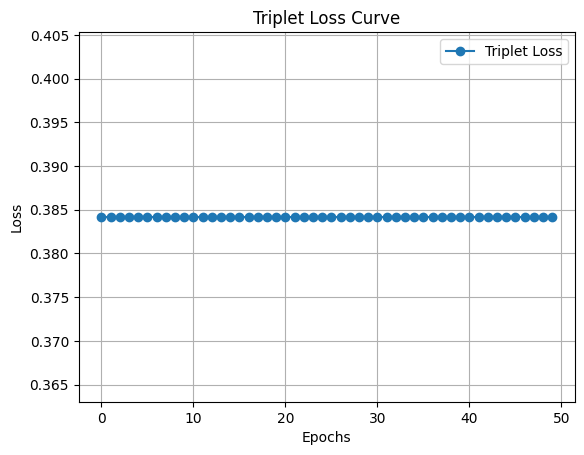

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the embeddings and labels from .npy files
embeddings = np.load('/content/drive/MyDrive/My_embeddings.npy')
labels = np.load('/content/drive/MyDrive/My_labels.npy')

# Encode string labels to numeric values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Convert embeddings and labels to torch tensors
embeddings_tensor = torch.tensor(embeddings, dtype=torch.float32)
labels_tensor = torch.tensor(encoded_labels, dtype=torch.long)

# Function to generate triplets
def generate_triplets(embeddings, labels):
    triplets = []
    for i in range(len(embeddings)):
        anchor_embedding = embeddings[i]
        anchor_label = labels[i]

        # Find a positive sample
        positive_indices = [j for j in range(len(labels)) if labels[j] == anchor_label and j != i]
        if len(positive_indices) == 0:
            continue
        positive_embedding = embeddings[np.random.choice(positive_indices)]

        # Find a negative sample
        negative_indices = [j for j in range(len(labels)) if labels[j] != anchor_label]
        if len(negative_indices) == 0:
            print(f"No negative example found for anchor at index {i}. Skipping...")
            continue
        negative_embedding = embeddings[np.random.choice(negative_indices)]

        # Store triplet
        triplets.append((anchor_embedding, positive_embedding, negative_embedding))

    return triplets

# Generate triplets
triplets = generate_triplets(embeddings_tensor, labels_tensor)
anchor_embeddings = torch.stack([t[0] for t in triplets])
positive_embeddings = torch.stack([t[1] for t in triplets])
negative_embeddings = torch.stack([t[2] for t in triplets])

print(f"Generated {len(triplets)} triplets.")

# Define a simple Triplet Loss function
triplet_loss_fn = torch.nn.TripletMarginLoss(margin=1.0)

# Training loop to track loss
num_epochs = 50
history = {"loss": []}

for epoch in range(num_epochs):
    epoch_loss = 0
    for i in range(len(anchor_embeddings)):
        anchor, positive, negative = anchor_embeddings[i], positive_embeddings[i], negative_embeddings[i]
        loss = triplet_loss_fn(anchor.unsqueeze(0), positive.unsqueeze(0), negative.unsqueeze(0))
        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(anchor_embeddings)
    history["loss"].append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f}")

# Plot loss curve
plt.plot(history["loss"], marker="o", label="Triplet Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Triplet Loss Curve")
plt.legend()
plt.grid()
plt.show()


# Visualization of the dataset

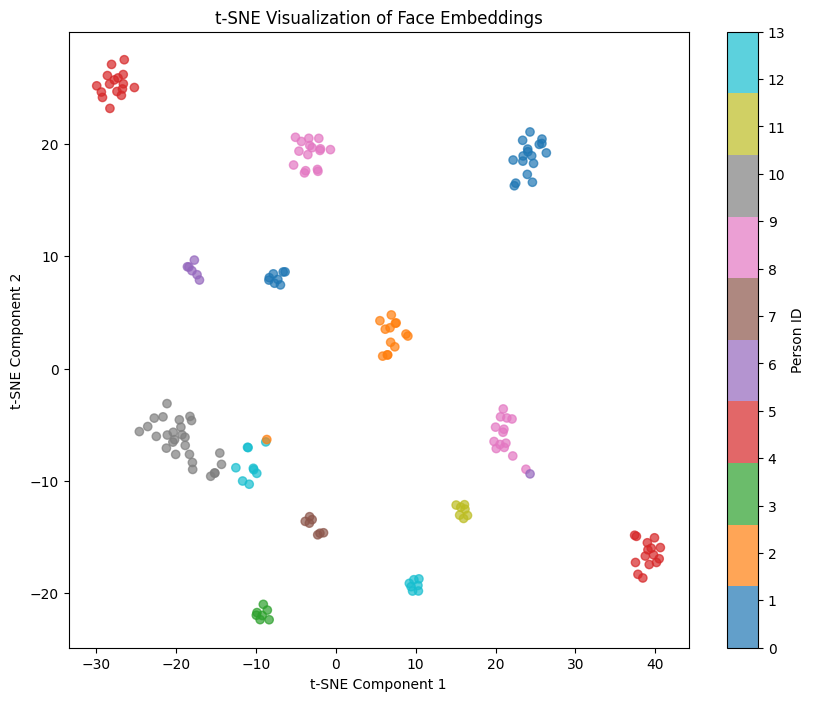

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# Load the embeddings and labels
embeddings = np.load('/content/drive/MyDrive/My_embeddings.npy')
labels = np.load('/content/drive/MyDrive/My_labels.npy')

# Encode string labels to numeric values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Reduce dimensionality to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=10, random_state=42)  # Adjust perplexity based on dataset size
embeddings_2d = tsne.fit_transform(embeddings)

# Plot the embeddings
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=encoded_labels, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, ticks=range(len(set(encoded_labels))), label="Person ID")
plt.title("t-SNE Visualization of Face Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


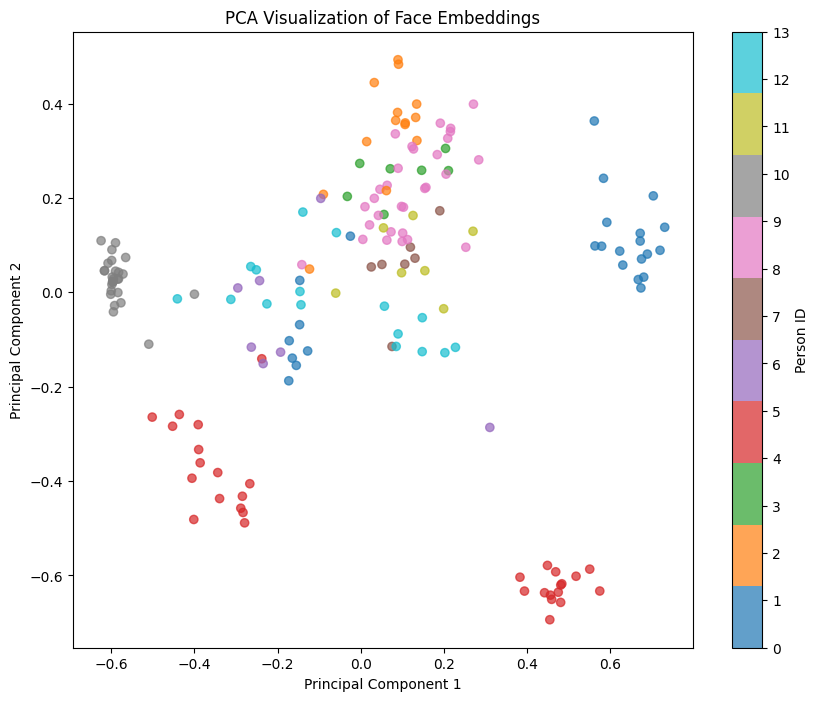

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Load the embeddings and labels
embeddings = np.load('/content/drive/MyDrive/My_embeddings.npy')
labels = np.load('/content/drive/MyDrive/My_labels.npy')

# Encode labels numerically
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plot the PCA-transformed embeddings
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=encoded_labels, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, ticks=range(len(set(encoded_labels))), label="Person ID")
plt.title("PCA Visualization of Face Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.0 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


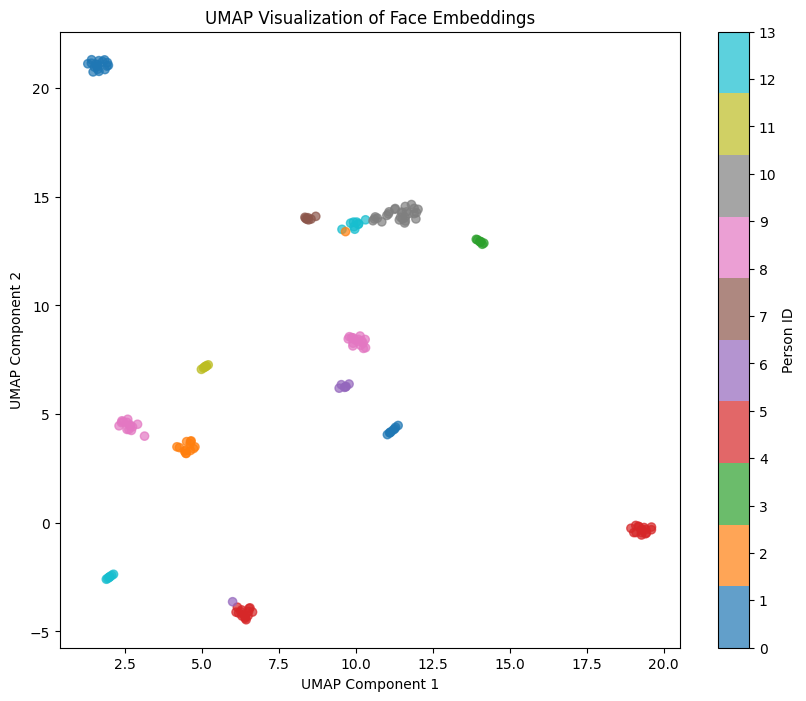

In [ ]:
! pip install umap-learn
import umap.umap_ as umap
import umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load embeddings and labels
embeddings = np.load('/content/drive/MyDrive/My_embeddings.npy')
labels = np.load('/content/drive/MyDrive/My_labels.npy')

# Encode labels numerically
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Apply UMAP for dimensionality reduction
umap_reducer = umap.UMAP(n_components=2, random_state=42)
embeddings_2d = umap_reducer.fit_transform(embeddings)

# Plot the UMAP-transformed embeddings
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=encoded_labels, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, ticks=range(len(set(encoded_labels))), label="Person ID")
plt.title("UMAP Visualization of Face Embeddings")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()


# Visualization in real time


In [ ]:
!pip install tensorboard

In [ ]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter("runs/triplet_loss_training")  # Create a TensorBoard log directory

for epoch in range(num_epochs):
    total_loss = 0
    for anchor_embeddings, positive_embeddings, negative_embeddings in dataloader:
        optimizer.zero_grad()
        loss = triplet_loss(anchor_embeddings, positive_embeddings, negative_embeddings)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    writer.add_scalar("Loss/train", avg_loss, epoch)  # Log loss to TensorBoard
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss}")

writer.close()
